# 用神经网络的方法来拟合三角函数的数据

## 一、制造数据
加入噪声

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-10,10,2000,dtype=np.float32)[:, np.newaxis]
y_noise = np.random.normal(0,0.1,x_data.shape)
y_data = np.sin(x_data) + y_noise
print(np.shape(x_data))
plt.plot(x_data,y_data)
plt.show()

(2000, 1)


<Figure size 640x480 with 1 Axes>

## 二、构建BP神经网络

In [2]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

#占位
x = tf.placeholder(tf.float32, [None, 1],name='x')
y = tf.placeholder(tf.float32, [None, 1],name='y')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')
#use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
#rate = tf.placeholder(tf.float32,name='rate')

#first fully layer
w_fc1 = weight_variable([1,512])
b_fc1 = bias_variable([512])
h_fc1 = tf.nn.relu(tf.nn.bias_add(tf.matmul(x, w_fc1), b_fc1))
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#2nd layer
w_fc2 = weight_variable([512,512])
b_fc2 = bias_variable([512])
h_fc2 = tf.nn.relu(tf.nn.bias_add(tf.matmul(h_fc1_drop, w_fc2), b_fc2))
h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#3nd layer
w_fc3 = weight_variable([512,512])
b_fc3 = bias_variable([512])
h_fc3 = tf.nn.relu(tf.nn.bias_add(tf.matmul(h_fc2_drop, w_fc3), b_fc3))
h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#4nd layer
w_fc4 = weight_variable([512,512])
b_fc4 = bias_variable([512])
h_fc4 = tf.nn.relu(tf.nn.bias_add(tf.matmul(h_fc3_drop, w_fc4), b_fc4))
h_fc4_drop = tf.nn.dropout(h_fc4, keep_prob)

#5 layer
w_fc5 = weight_variable([512,1])
b_fc5 = bias_variable([1])
y_pred = tf.nn.bias_add(tf.matmul(h_fc4_drop, w_fc5), b_fc5,name='y_pred')

W0718 14:58:00.794676  5844 deprecation.py:506] From <ipython-input-2-57117561d62b>:20: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 三、定义损失函数和优化器

In [3]:
loss = tf.reduce_mean(tf.square(y - y_pred))
train_step = tf.compat.v1.train.AdamOptimizer(1e-4).minimize(loss)

## 四、开始运算

step:100,train loss:0.462204


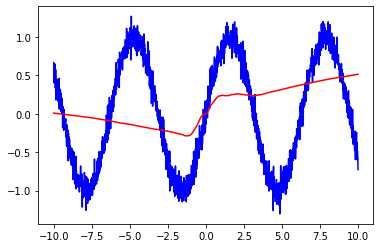

step:200,train loss:0.458757


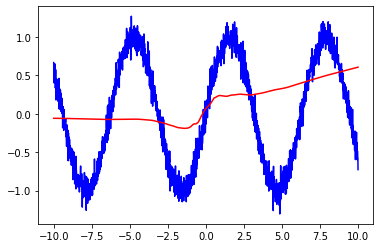

step:300,train loss:0.436470


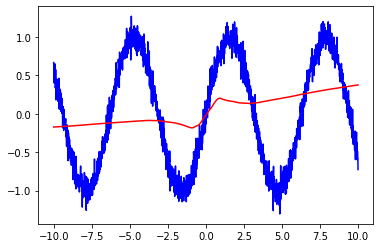

step:400,train loss:0.431224


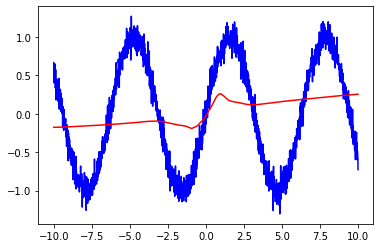

step:500,train loss:0.421746


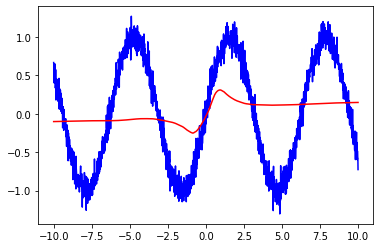

step:600,train loss:0.404336


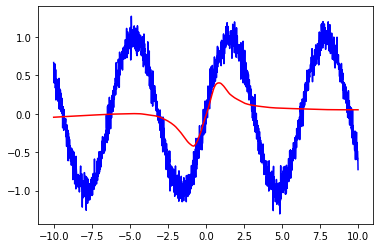

step:700,train loss:0.379395


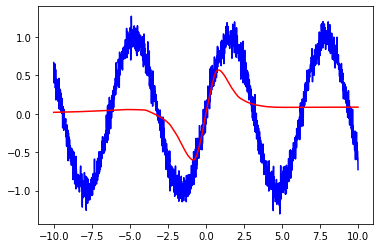

step:800,train loss:0.371023


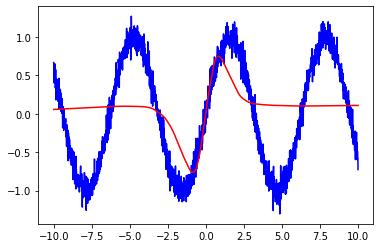

step:900,train loss:0.362029


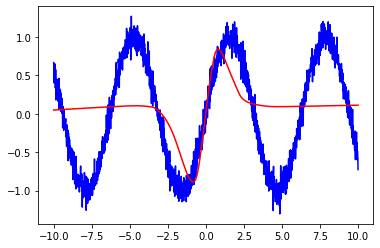

step:1000,train loss:0.356400


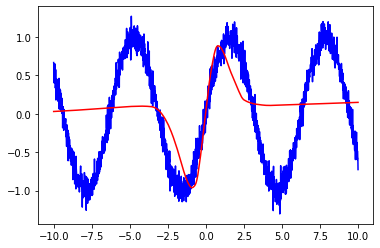

step:1100,train loss:0.352721


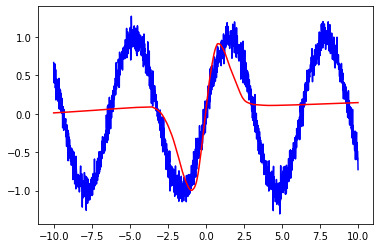

step:1200,train loss:0.347966


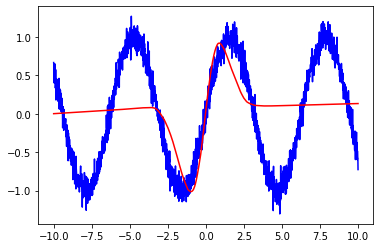

step:1300,train loss:0.342583


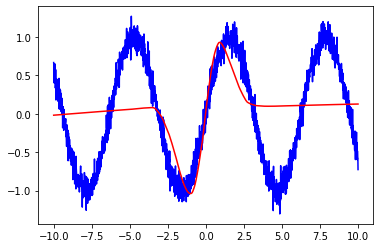

step:1400,train loss:0.335793


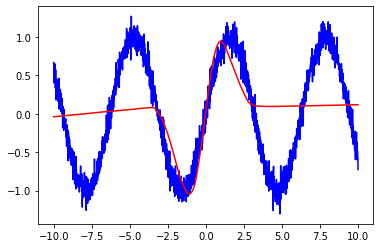

step:1500,train loss:0.327496


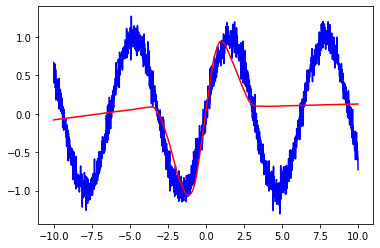

step:1600,train loss:0.318511


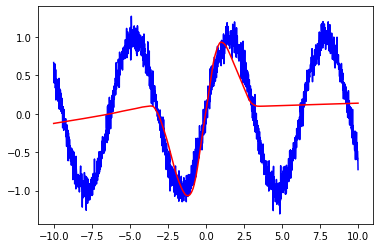

step:1700,train loss:0.308172


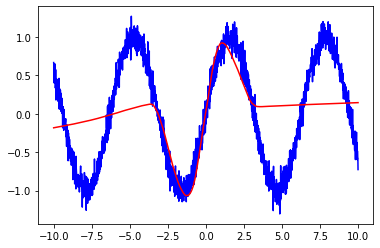

step:1800,train loss:0.295074


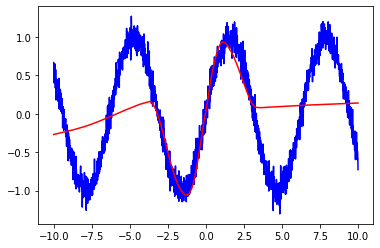

step:1900,train loss:0.281416


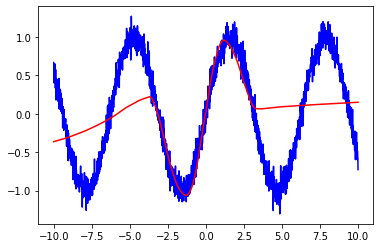

step:2000,train loss:0.261663


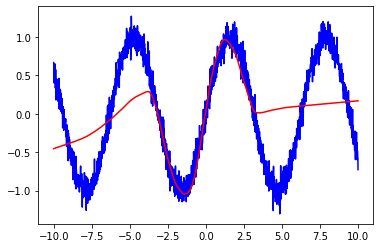

step:2100,train loss:0.235623


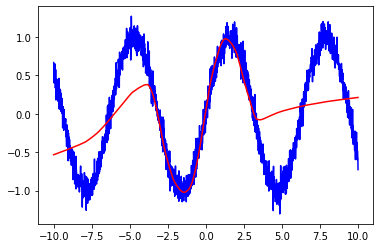

step:2200,train loss:0.207080


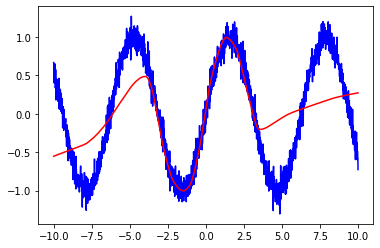

step:2300,train loss:0.182082


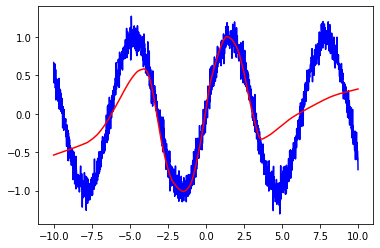

step:2400,train loss:0.161346


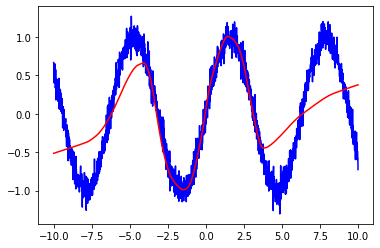

step:2500,train loss:0.145079


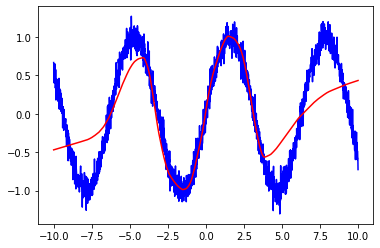

step:2600,train loss:0.131338


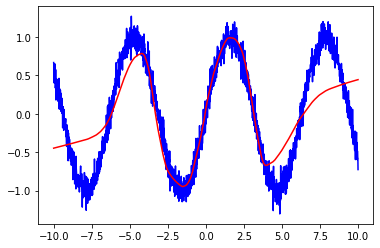

step:2700,train loss:0.119003


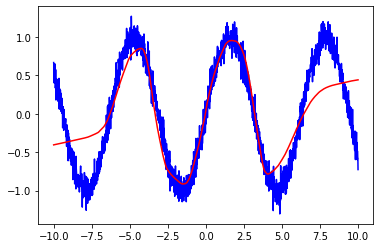

step:2800,train loss:0.114062


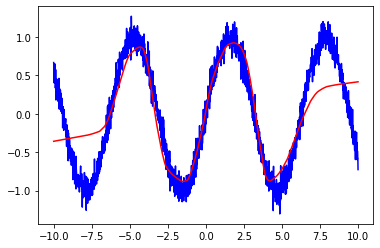

step:2900,train loss:0.109486


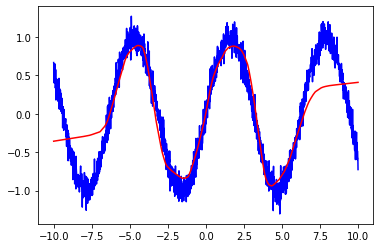

step:3000,train loss:0.108874


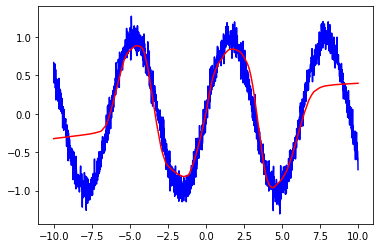

step:3100,train loss:0.106307


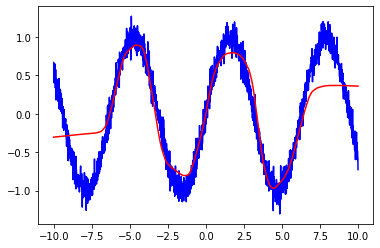

step:3200,train loss:0.106001


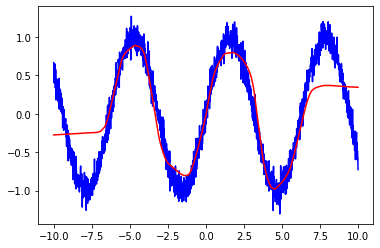

step:3300,train loss:0.105420


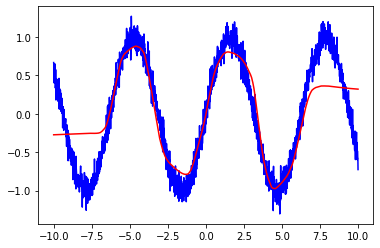

step:3400,train loss:0.105055


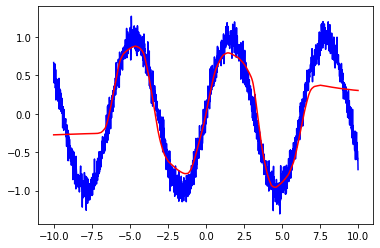

step:3500,train loss:0.106441


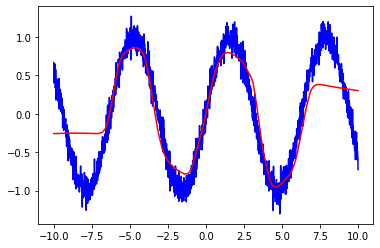

step:3600,train loss:0.105543


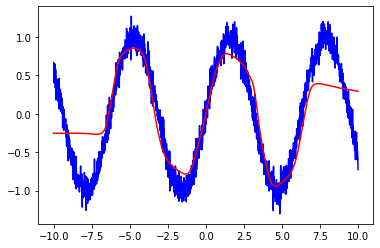

step:3700,train loss:0.105649


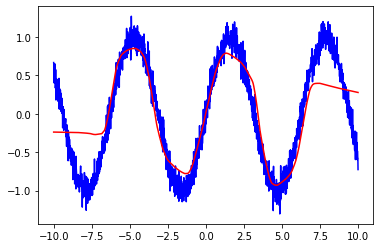

step:3800,train loss:0.105132


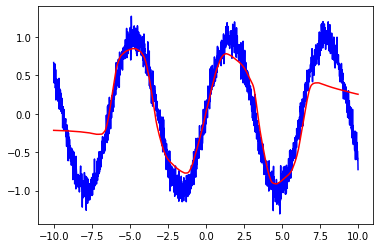

step:3900,train loss:0.104080


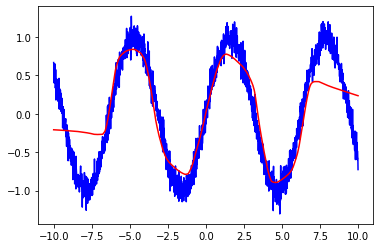

step:4000,train loss:0.103274


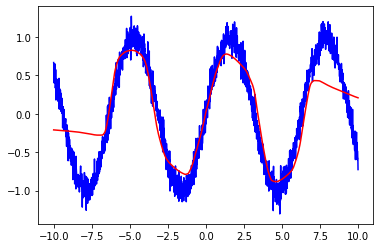

step:4100,train loss:0.101594


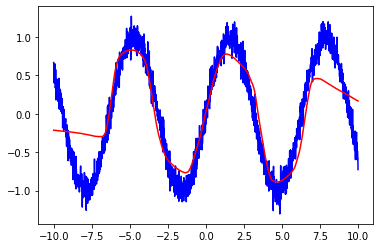

step:4200,train loss:0.098023


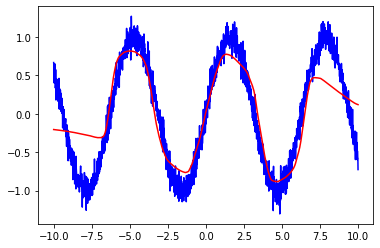

step:4300,train loss:0.096142


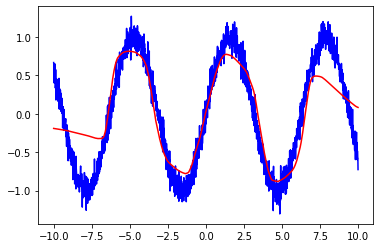

step:4400,train loss:0.095549


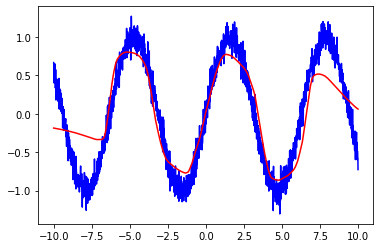

step:4500,train loss:0.089902


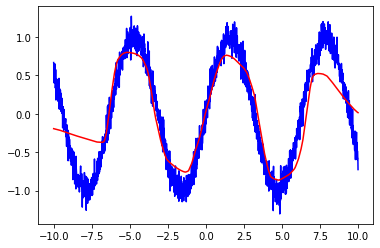

step:4600,train loss:0.089379


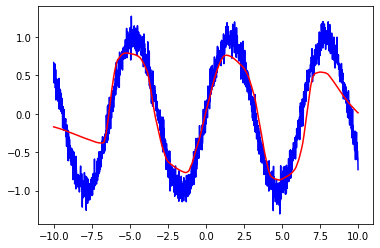

step:4700,train loss:0.088678


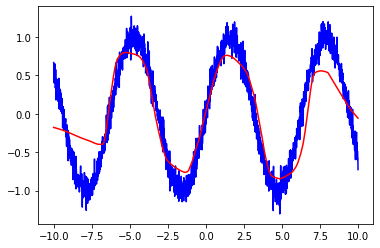

step:4800,train loss:0.083364


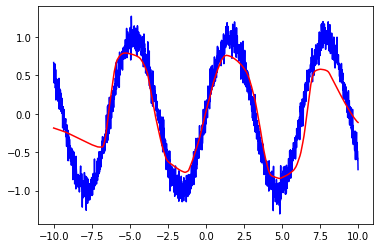

step:4900,train loss:0.082509


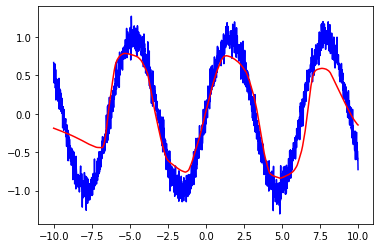

step:5000,train loss:0.079041


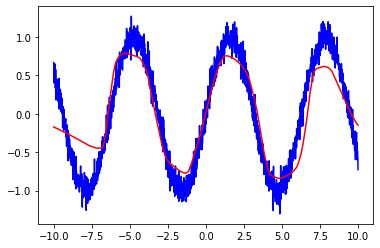

step:5100,train loss:0.074915


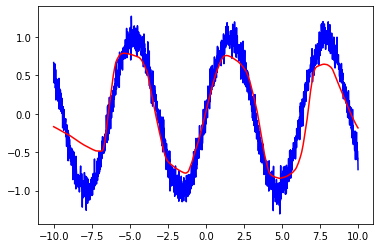

step:5200,train loss:0.073425


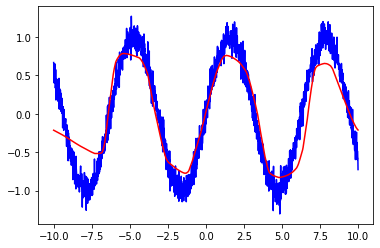

step:5300,train loss:0.074213


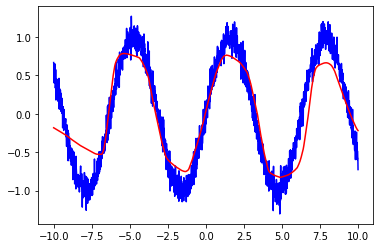

step:5400,train loss:0.069736


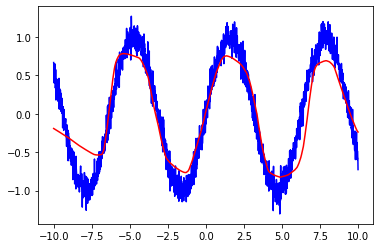

step:5500,train loss:0.066876


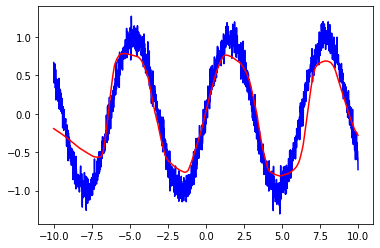

step:5600,train loss:0.066867


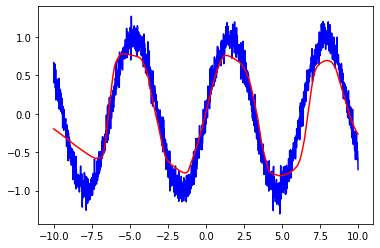

step:5700,train loss:0.065453


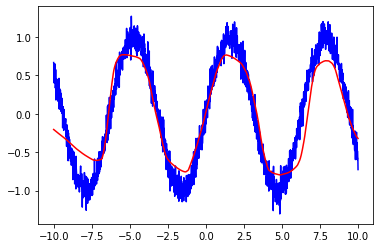

step:5800,train loss:0.064494


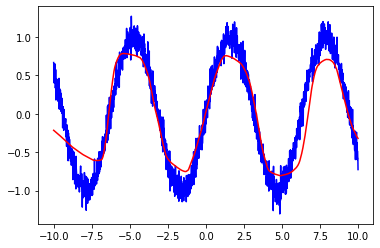

step:5900,train loss:0.063292


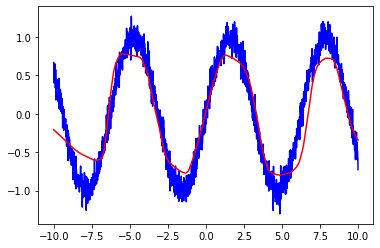

step:6000,train loss:0.062061


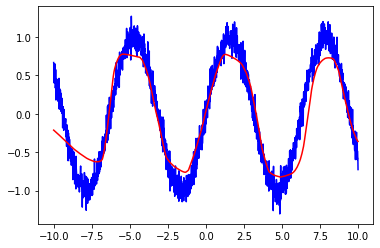

step:6100,train loss:0.062583


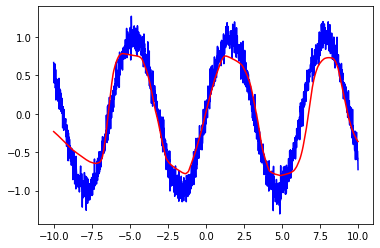

step:6200,train loss:0.062331


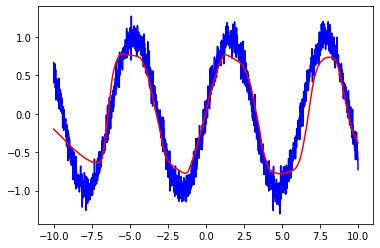

step:6300,train loss:0.061618


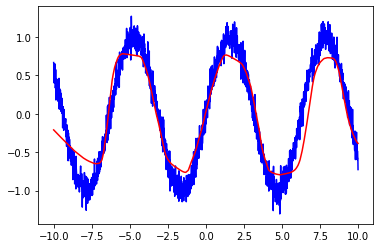

step:6400,train loss:0.062103


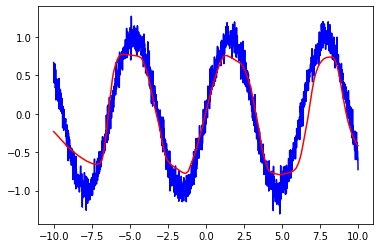

step:6500,train loss:0.059852


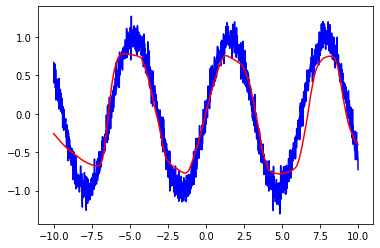

step:6600,train loss:0.059877


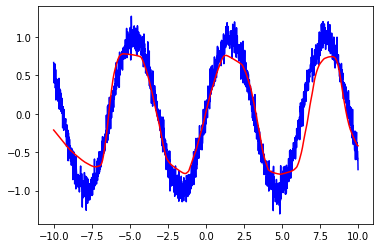

step:6700,train loss:0.060236


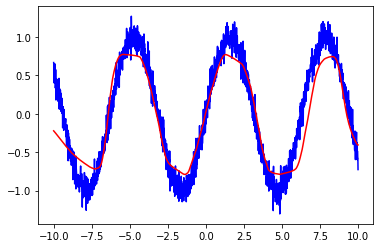

step:6800,train loss:0.058471


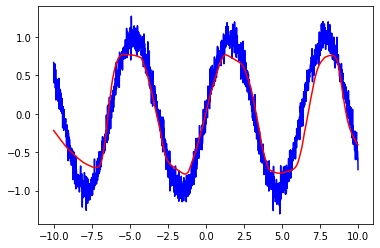

step:6900,train loss:0.057883


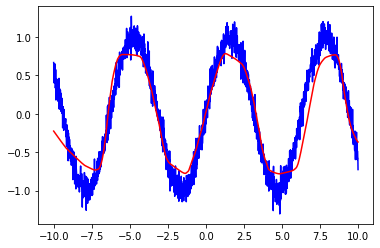

step:7000,train loss:0.058502


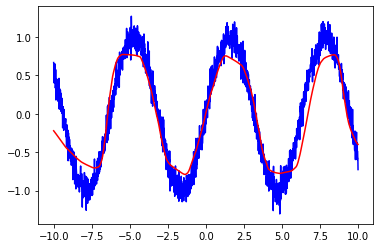

step:7100,train loss:0.056340


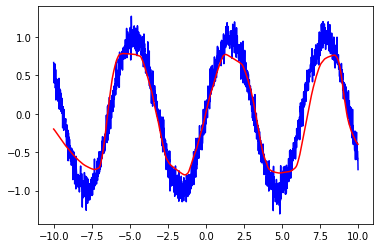

step:7200,train loss:0.053414


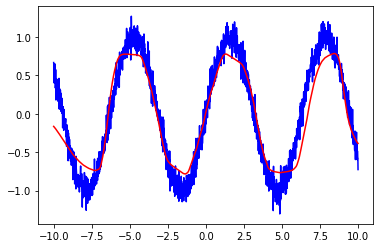

step:7300,train loss:0.053180


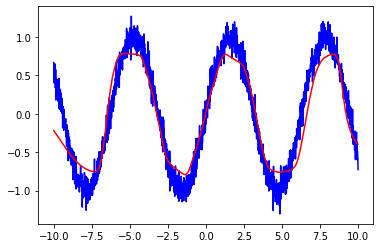

step:7400,train loss:0.051968


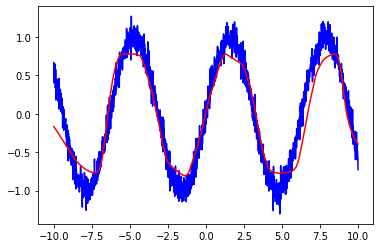

step:7500,train loss:0.051069


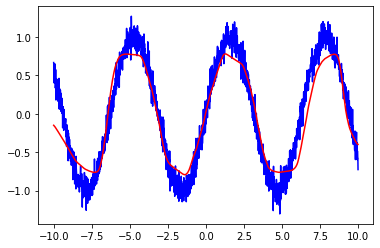

step:7600,train loss:0.053071


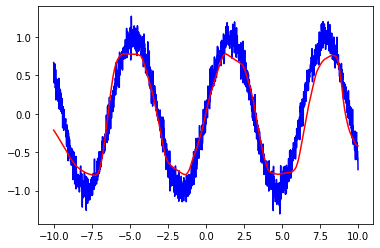

step:7700,train loss:0.049965


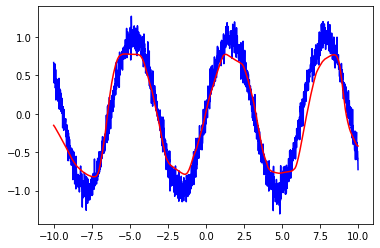

step:7800,train loss:0.048773


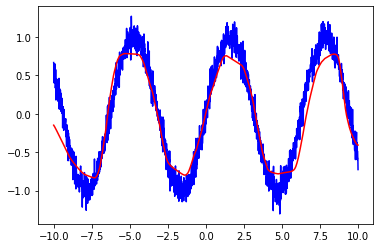

step:7900,train loss:0.048845


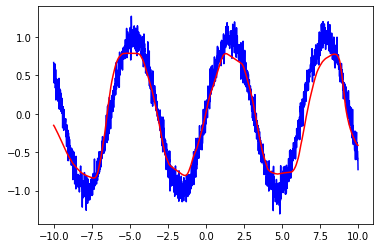

step:8000,train loss:0.044826


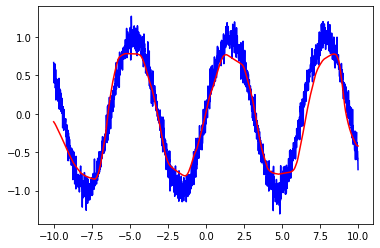

step:8100,train loss:0.047888


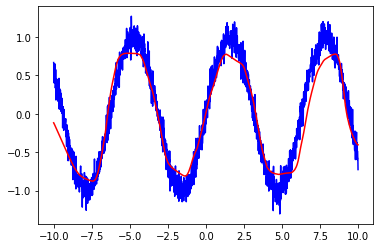

step:8200,train loss:0.043245


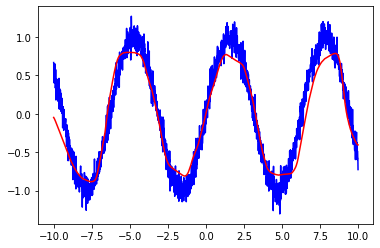

step:8300,train loss:0.043051


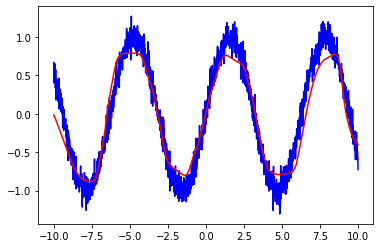

step:8400,train loss:0.040906


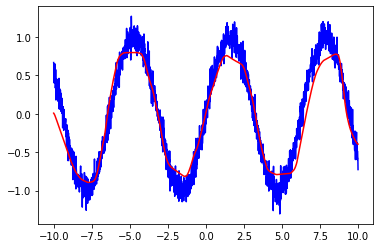

step:8500,train loss:0.041772


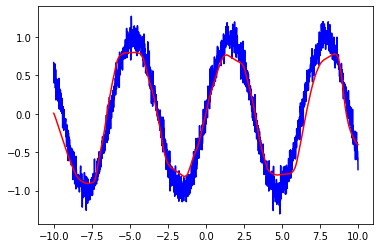

step:8600,train loss:0.041588


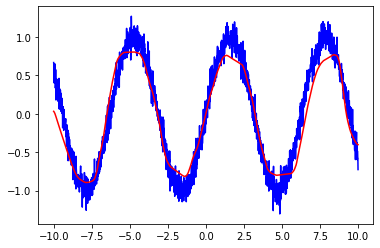

step:8700,train loss:0.037021


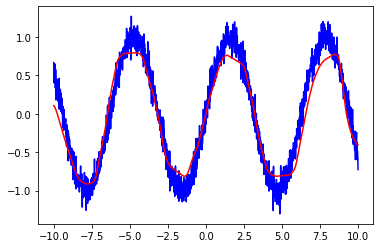

step:8800,train loss:0.037509


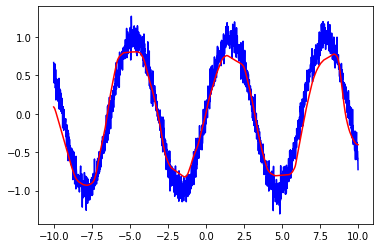

step:8900,train loss:0.036657


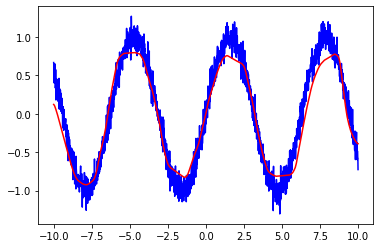

step:9000,train loss:0.034508


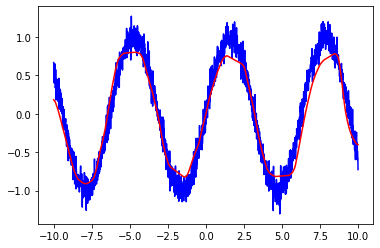

step:9100,train loss:0.036934


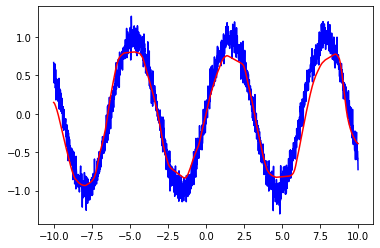

step:9200,train loss:0.035416


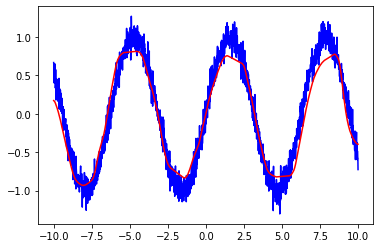

step:9300,train loss:0.035201


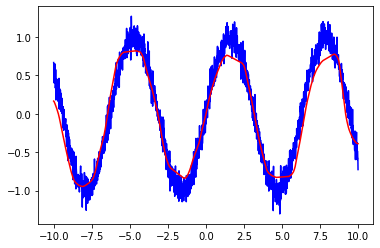

step:9400,train loss:0.035666


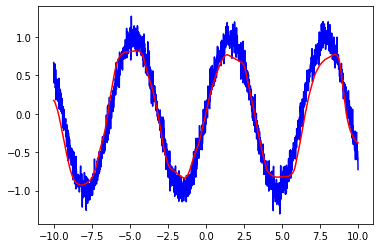

step:9500,train loss:0.033096


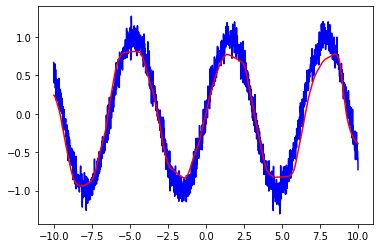

step:9600,train loss:0.032298


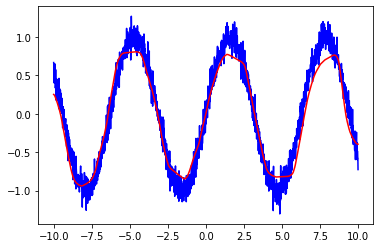

step:9700,train loss:0.032017


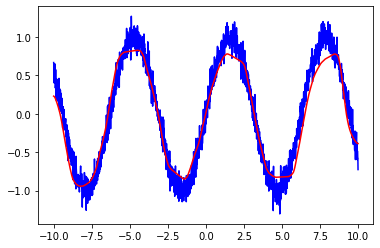

step:9800,train loss:0.031645


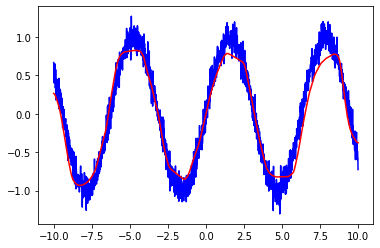

step:9900,train loss:0.031175


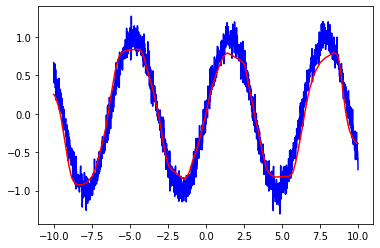

step:10000,train loss:0.030810


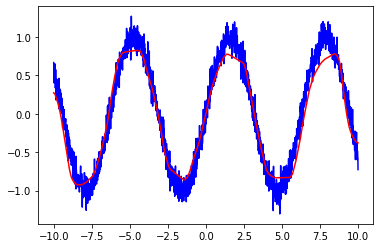

In [4]:
with tf.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    step = 1
    train_loss=1
    while step<=10001:
        sess.run(train_step,feed_dict={x: x_data, y: y_data, keep_prob: 0.75})
        if step%100 == 0:
            pred,train_loss = sess.run([y_pred,loss],feed_dict={x: x_data, y: y_data, keep_prob: 1.00})
            print ('step:%d,train loss:%f' % (step,train_loss))
            plt.plot(x_data,y_data,'b',x_data,pred,'r')
            plt.show()
        step += 1